Vamos começar obtendo os dados para análise. 
Nós acrescentamos uma classe chamada "mais_atropelada" e atribuimos 1 para o anfibio mais atropelado e 0 para todos os demais. 

In [2]:
import pandas as pd

# seleciona os dados do arquivos
# data frame (df) - molde de dados
dados = pd.read_csv('CSV_Anfibios_Cortada.csv')
dados.head()

,Mês,Estação,Trecho,Sentido,Trecho macro,Tipo De Pistas,Numero de Pistas,Tipo de Pavimento,Numero de Faixas,Velocidade Maxima,...,Agua?,Vegetação Baixa?,capimAlto,Arbustos,Floresta,Local,Com filhotes?,Faixa Horário da Coleta,Faixa de Quilometragem,É anfíbio mais atropelado?
0,4,Outono,2,JF,Baixada,Sem divisão,1,Pavimento flexível (asfalto),4,110,...,sim,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Pista de rolamento,Desconhecido,Entre 00 e 06,Entre 100 e 125,0
1,4,Outono,4,JF,Serra,Sem divisão,1,Pavimento rígido,2,60,...,sim,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Pista de rolamento,Desconhecido,Entre 06 e 12,Entre 75 e 100,0
2,5,Outono,5,JF,Serra,Sem divisão,1,Pavimento semi-flexível,2,60,...,sim,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Entre 12 e 18,Entre 75 e 100,0
3,6,Outono,7,RJ,Planalto,Defensa Metálica,2,Pavimento flexível (asfalto),4,60,...,sim,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Acostamento,Desconhecido,Entre 06 e 12,Entre 50 e 75,0
4,6,Outono,3,RJ,Serra,Defensa Metálica,2,Pavimento flexível (asfalto),4,80,...,não,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Acesso/ Retorno,Desconhecido,Entre 12 e 18,Entre 100 e 125,0


Agora vamos separar os atributos a serem estudados da classe a ser prevista. 

In [3]:
Y_df = dados['É anfíbio mais atropelado?']  
X_df = dados[["Mês", "Estação", 
              "Trecho", "Sentido", "Trecho macro",
              "Tipo De Pistas", "Numero de Pistas",
              "Tipo de Pavimento", "Numero de Faixas",
              "Velocidade Maxima", "Tipo da Chuva","Intervencao",
              "Vazamento", "Agua?", "Vegetação Baixa?","capimAlto",
              "Arbustos","Floresta","Local","Com filhotes?",
              "Faixa Horário da Coleta","Faixa de Quilometragem"]]


Podemos analisar qual a proporção de atropelados para não atropelados.

In [4]:
Y_df.value_counts()

0    12915
1      181
Name: É anfíbio mais atropelado?, dtype: int64

In [5]:
#  Transformando em um array 
x = X_df.values
y = Y_df.values

Agora vamos preparar para o modelo, dividindo os dados para teste e para treino:
Aqui também separamos uma parte para validar o modelo com base em um algoritmo que vai tentar prever pelo que mais ocorre.

In [6]:
# divide os dados 2/3 treino, 1/3 teste  e 10% pra validacao
porcentagem_treino = 0.67
porcentagem_teste  = 0.33

tamanho_treino    = int(porcentagem_treino * len(y))
tamanho_teste     = int(porcentagem_teste * len(y))

# 0 ate 66% -> treino
treino_x = x[0:tamanho_treino]
treino_y = y[0:tamanho_treino]

# 66 ate 100% - teste
fim_do_teste = tamanho_treino + tamanho_teste
teste_x      = x[tamanho_treino:fim_do_teste]
teste_y      = y[tamanho_treino:fim_do_teste]


Vamos criar uma função que treina o modelo, faz as previsoes e retorna a taxa de acerto

In [7]:
def fit_predict_model(nome, modelo):
    # treina modelo
    modelo.fit(treino_x, treino_y)
    
    # testa modelo
    teste = modelo.predict(teste_x) # Pega as previsoes do modelo para os valores X de teste
    acertos = teste == teste_y # Verifica se o modelo acertou

    total_de_acertos = sum(acertos)
    total_de_elementos = len(teste_x)

    taxa_de_acerto = 100.0 * total_de_acertos / total_de_elementos

    msg = "A taxa de acerto do {} foi: {:.2f}%".format(nome, taxa_de_acerto)
    print(msg)

    return taxa_de_acerto

O Naive Bayes possui 3 tipos de algoritmos diferentes, vamos testar qual é o melhor.
Vamos importar os modelos e chamar a função para cada um deles. 

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

modelo_multinomial = MultinomialNB ()
resultado_multinomial = fit_predict_model("Multinomial", modelo_multinomial)

modelo_gaussiano = GaussianNB ()
resultado_gaussiano = fit_predict_model("gaussiano", modelo_gaussiano)

modelo_bernoulli = BernoulliNB ()
resultado_bernoulli = fit_predict_model("bernoulli", modelo_bernoulli)

ValueError: could not convert string to float: 'Outono'

Ele nos retorna um erro, pois o Naive bayes só aceita variaveis numéricas, e possuimos muitas variaveis categóricas. Será necessário transformar cada uma delas em diferentes classes. Nossa sorte é que já existe um algoritmo que faz isso:

In [15]:
Xdummies_df = pd.get_dummies(X_df)
Xdummies_df.head()

# for col in Xdummies_df.columns: 
#     print(col)



,Mês,Trecho,Estação_Inverno,Estação_Outono,Estação_Primavera,Estação_Verão,Estação_inverno,Estação_outono,Estação_primavera,Estação_verão,...,Faixa Horário da Coleta_Entre 18 e 00,Faixa de Quilometragem_Entre 0 e 25,Faixa de Quilometragem_Entre 100 e 125,Faixa de Quilometragem_Entre 25 e 50,Faixa de Quilometragem_Entre 50 e 75,Faixa de Quilometragem_Entre 75 e 100,Faixa de Quilometragem_Entre 750 e 775,Faixa de Quilometragem_Entre 775 e 800,Faixa de Quilometragem_Entre 800 e 825,Faixa de Quilometragem_Entre 825 e 850
0,4,2,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,4,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,5,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,6,7,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,6,3,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [21]:
# Redefinindo os valores de x 
x = Xdummies_df.values
y = Y_df.values 

# divide os dados 2/3 treino, 1/3 teste  e 10% pra validacao
porcentagem_treino = 0.67
porcentagem_teste  = 0.33

tamanho_treino    = int(porcentagem_treino * len(y))
tamanho_teste     = int(porcentagem_teste * len(y))

# 0 ate 60% -> treino
treino_x = x[0:tamanho_treino]
treino_y = y[0:tamanho_treino]

# 60 ate 100% - teste
fim_do_teste = tamanho_treino + tamanho_teste
teste_x      = x[tamanho_treino:fim_do_teste]
teste_y      = y[tamanho_treino:fim_do_teste]

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

modelo_multinomial = MultinomialNB ()
resultado_multinomial = fit_predict_model("Multinomial", modelo_multinomial)

modelo_gaussiano = GaussianNB ()
resultado_gaussiano = fit_predict_model("gaussiano", modelo_gaussiano)

modelo_bernoulli = BernoulliNB ()
resultado_bernoulli = fit_predict_model("bernoulli", modelo_bernoulli)

A taxa de acerto do Multinomial foi: 59.08%
A taxa de acerto do gaussiano foi: 56.03%
A taxa de acerto do bernoulli foi: 51.84%


Vemos que nosso algoritmo não é tão bom, pois a taxa de acerto é bem baixa.
Até então, estamos separando os dados de forma sequencial. Para melhorar o resultado, vamos separar de forma aleatória.

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split

print(treino_x, "\n")

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.33,
                                                         stratify = y)

print(treino_x)

[[10  4  0 ...  0  0  0]
 [12 11  0 ...  0  0  0]
 [ 7 18  1 ...  1  0  0]
 ...
 [ 1  6  0 ...  0  0  0]
 [10 13  0 ...  0  0  1]
 [11  7  0 ...  0  0  0]] 

[[10  4  0 ...  0  0  0]
 [12 11  0 ...  0  0  0]
 [ 7 18  1 ...  1  0  0]
 ...
 [ 1  6  0 ...  0  0  0]
 [10 13  0 ...  0  0  1]
 [11  7  0 ...  0  0  0]]


Aplicando novamente no modelo:

In [30]:
modelo_multinomial = MultinomialNB ()
resultado_multinomial = fit_predict_model("Multinomial", modelo_multinomial)


A taxa de acerto do Multinomial foi: 97.78%


Vamos analisar esses resultados.

A acuracia foi de 97.78%
Matriz de confusão


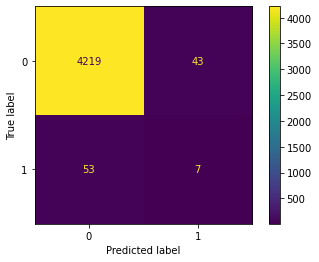

Matriz de correlação


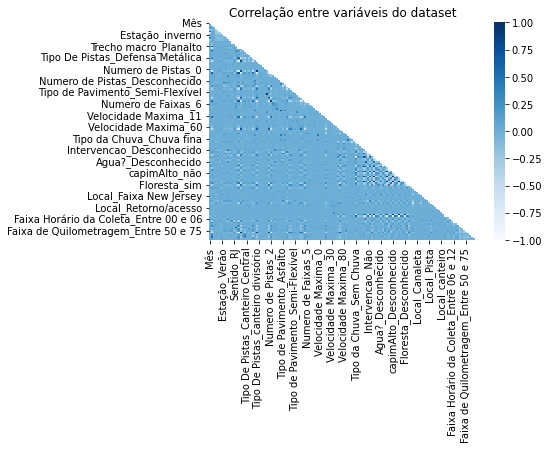

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# treina modelo
modelo_multinomial.fit(treino_x, treino_y)

# testa modelo
y_predict = modelo_multinomial.predict(teste_x) # Pega as previsoes do modelo para os valores X de teste
y_true = teste_y

acuracia = accuracy_score(y_true, y_predict)
msg_acuracia = "A acuracia foi de {:.2f}%".format(acuracia*100)
print(msg_acuracia)

print("Matriz de confusão")
matriz_confusao = confusion_matrix(y_true, y_predict)
matriz = ConfusionMatrixDisplay(matriz_confusao)
matriz.plot()
plt.show()

print("Matriz de correlação")
dados_transformados = pd.get_dummies(dados)
mask = np.triu(np.ones_like(dados_transformados.corr()))
sns.heatmap(dados_transformados.corr(),
            mask=mask,
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

# print("Importância de cada feature")
# importances = pd.Series(data=modelo_multinomial.feature_importances_, index=dados.feature_names)
# sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

